# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# Problem
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.


# Objective

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

In [1]:
!jupyter nbconvert --to html Project.ipynb

[NbConvertApp] WARNING | pattern 'Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exe

## Import all the necessary libraries

In [4]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
df = pd.read_csv('/content/drive/MyDrive/Business Statistics/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [24]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [25]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [26]:
df.shape

(100, 6)

**Observations:**

There are 100 rows and 6 columns in this data set.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**

- User_id is an integer

- time_spent_on_the_page is a float

- Group, landing_page, converted, and language_preffered are object types




In [10]:
df.describe( include = 'object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [27]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [28]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [29]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [30]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

**Observations:**

- All the variables have a 100 entries each, meaning that there is no missing data.

- The group variable has two unique values, control and treatment, which both have 50 entries

- The landing_page variable has two unique values, old and new, with 50 entries each

- The converted variable has two unique values, yes and no, yes with 54 and no with 46 entries

- The language_preferred variable has three unique values: Spanish, French, English. Spanish with 34, French with 34, and English with 32 entries.

In [15]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations:**

- The average time spent on the page is
about 5.38 minutes with a standard deviation of 2.38 minutes

- The minimum time spent on the page was 0.19 minutes and the maximum time spent on the page was 10.71 minutes

- 50% of the entries spent about 5.42 minutes on the page



In [16]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations:**

There are no null values in this dataset.

In [17]:
df.duplicated().sum()

0

**Observations:**

There are no duplicated values in this dataset.



### Univariate Analysis

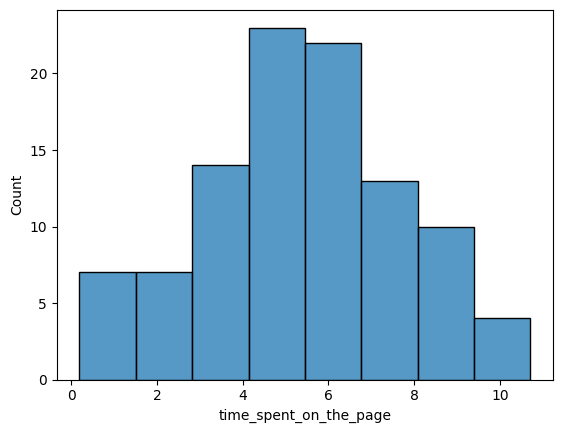

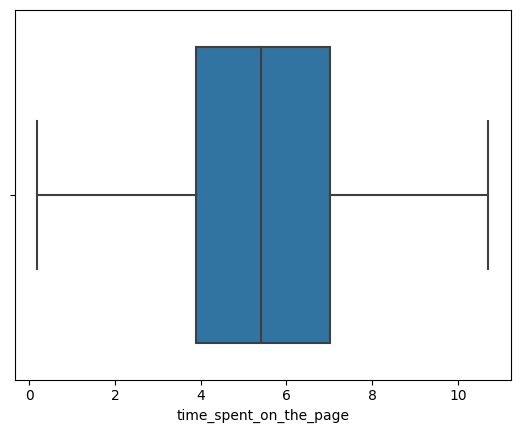

In [18]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

**Observation:**

The time spent on the page appears to be normally distributed and has no outliers.

In [20]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

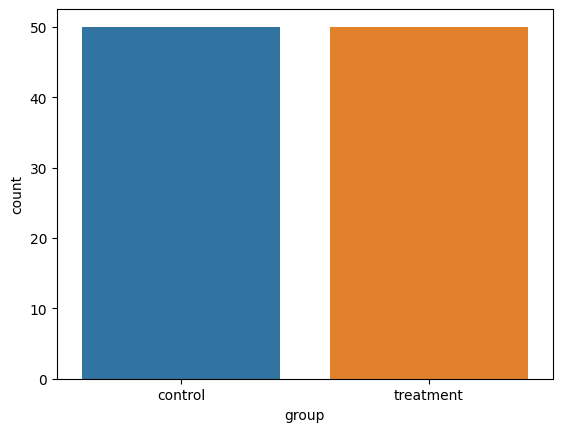

In [19]:
sns.countplot(data=df,x='group')
plt.show()

**Observation:**

The sample is equally split amongst the control and treatment groups.

In [21]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

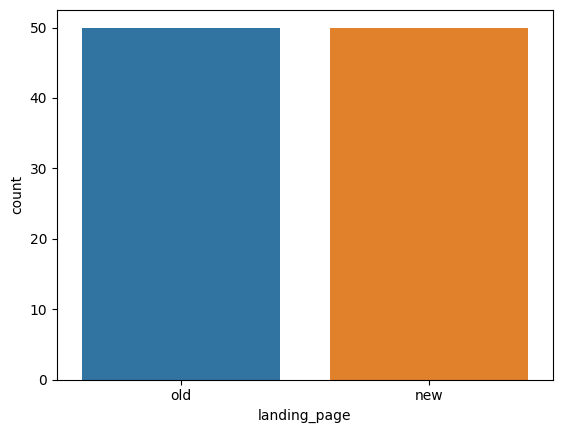

In [22]:
sns.countplot(data=df,x='landing_page')
plt.show()

**Observation:**

The sample is equally split amongst the old and new landing pages.

In [32]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

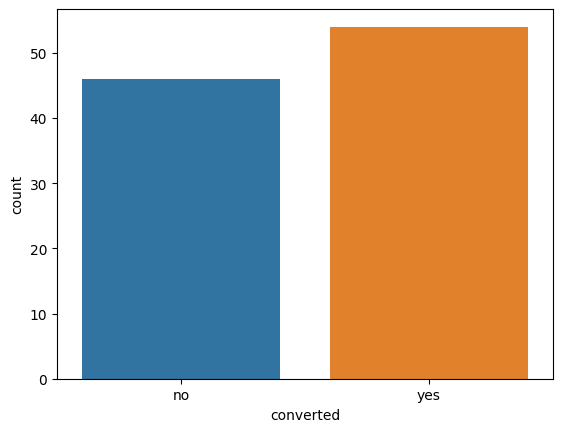

In [33]:
sns.countplot(data=df,x='converted')
plt.show()

**Observations:**

There are more people who converted to the new landing page than people who did not convert.

In [34]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

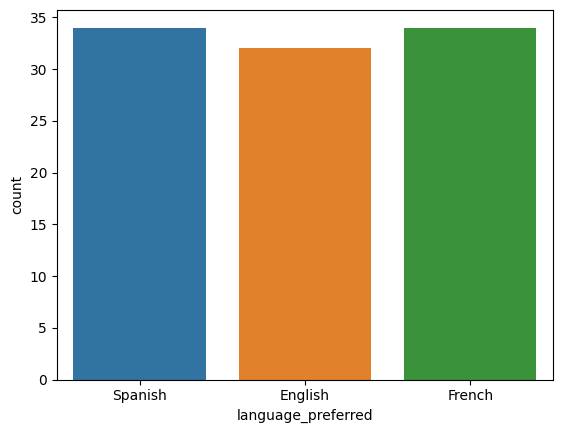

In [35]:
sns.countplot(data=df, x='language_preferred')
plt.show()

**Observations:**

- Spanish and French have the most amount of entries with 34 each and English had the least amount of entries with 32.

### Bivariate Analysis

### Landing page vs. Time spent on the page

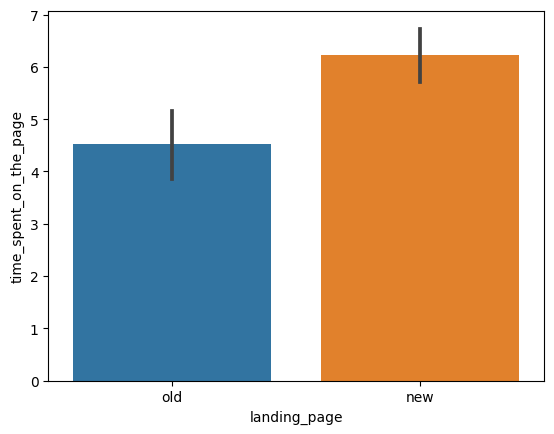

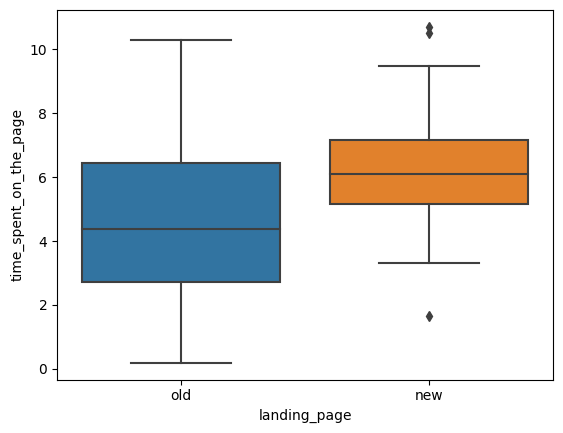

In [36]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Conversion status vs Time spent on the page

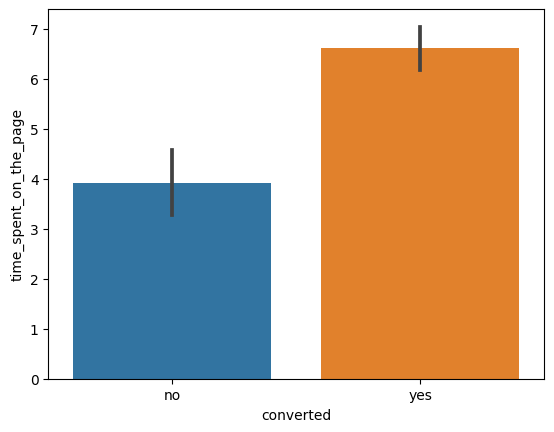

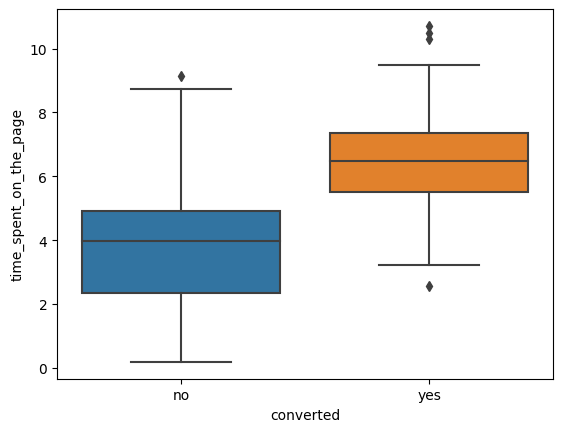

In [37]:
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

**Observations:**

The graph shows that those who converted to a subscriber spent more time on the page.

### Language preferred vs Time spent on the page

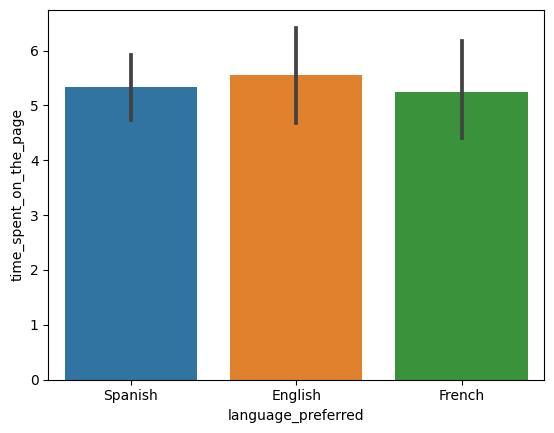

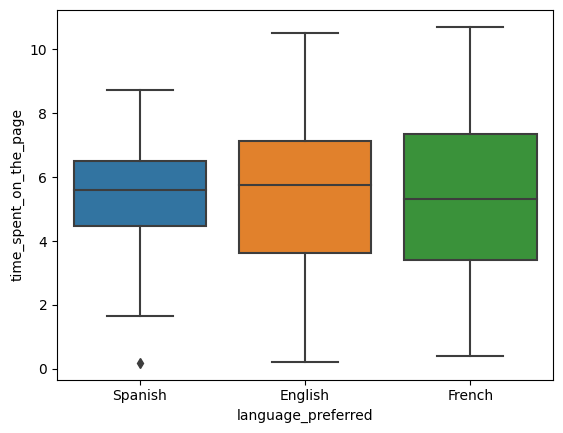

In [38]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

**Observations:**

- The average time spent on the page shows similar for all the preferred languages. Users who preferred Spanish have the smallest spread in time spent on the page.

### Relationship between preferred language, conversion status, and landing page

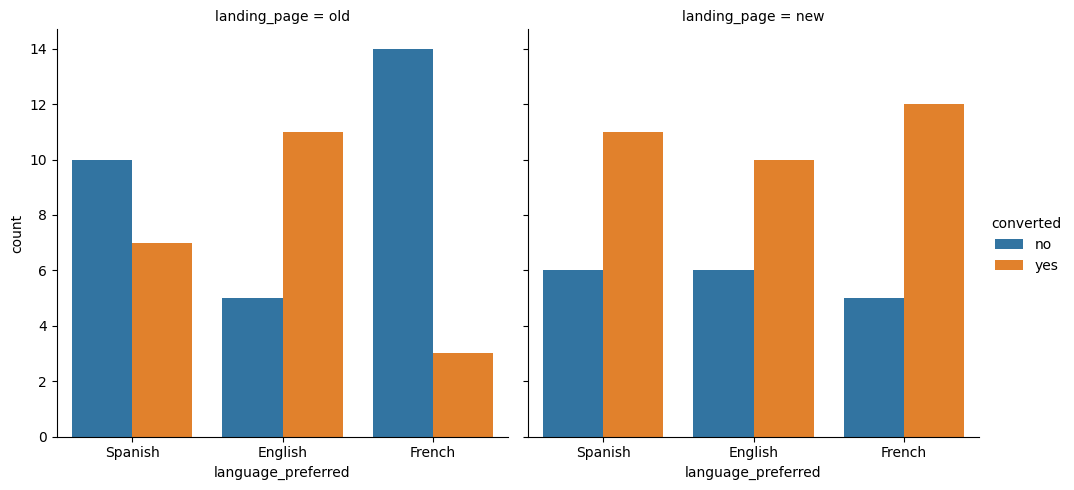

In [39]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count');

**Observations:**

Users that preferred Spanish and French chose not to convert to a subscriber when viewing the old landing page. Users of all language preferences converted to subscribers when viewing the new landing page.

### Relationship between preferred language, time spent on the page, and conversion status

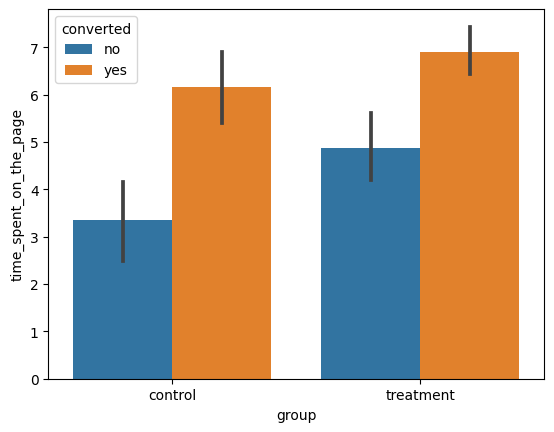

In [40]:
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page', hue = 'converted');

**Observations:**

More people converted to subscribers in the treatment group compared to the control group. Also users in the treatment group spent more time on the page in comparison to people in the control group.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

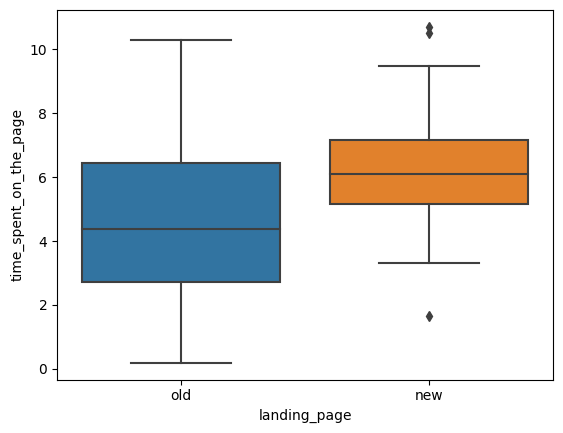

In [41]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

**Observations:**

The average time spent on the new page seems greater than the old page.

### Step 1: Define the null and alternate hypotheses

H0
 : The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

Ha
 : The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, a **two-sample independent t-test** would be the most appropriate.

### Step 3: Decide the significance level

As given in the problem statement, we select  **$\alpha$ = 0.05**

### Step 4: Collect and prepare data

In [42]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [44]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, the population standard deviations can be assumed to be unequal.**

**Two-sample independent t-test assumptions:**

- Continuous data - Yes, the time spent on the pages is measured on a continuous scale.
- Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
- Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
- Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
- Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

### Step 5: Calculate the p-value

In [45]:
from scipy.stats import ttest_ind

test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [46]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is much less than the level of significance of 5%, the null hypothesis is rejected. This means that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [47]:
pd.crosstab(df['landing_page'],df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


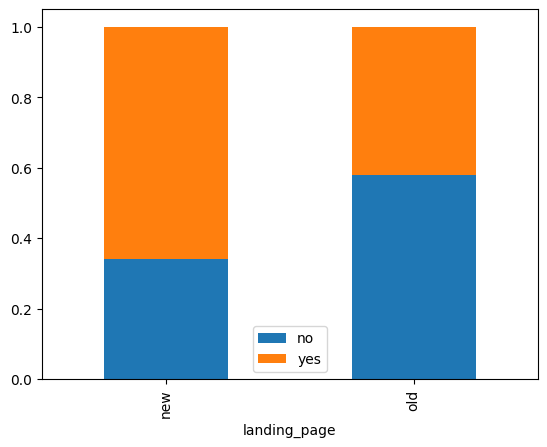

In [48]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.show()

**Observations:**

The users on the new landing page are more likely to convert to subscribers than users on the old landing page.

### Step 1: Define null and alternative hypothesis

H0:
  The conversion rate of the new page is equal to the conversion rate of the old page.

Ha:
  The conversion rate of the new page is greater than the conversion rate of the old page.

### Step 2: Select Appropriate Test

This is a one-tailed test concerning two population proportions from two independent populations. Based on this information, a **two proportion z-test** would be the most appropriate.

###Step 3: Decide the significance level

As given in the problem statement, we select **$\alpha$ = 0.05**.

###Step 4: Collect and prepare data

In [51]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

#total number of users in the treatment and control groups
n_treatment = df.group.value_counts()['treatment']
n_control = df.group.value_counts()['control']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


**Two-proportion z-test assumptions:**

- Binomally distributed population - Yes, a user is either converted or not converted.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- Can the binomial distribution approximated to normal distribution - Yes.

###Step 5: Calculate the p-value

In [52]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


###Step 6: Compare the p-value $\alpha$

In [53]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


###Step 7: Draw inference


Since the p-value is much less than the level of significance at 5%, the null hypothesis is rejected. This means that their is significant evidence that the conversion rate of the new page is greater than the conversion rate of the old page.

## 3. Is the conversion and preferred language are independent or related?

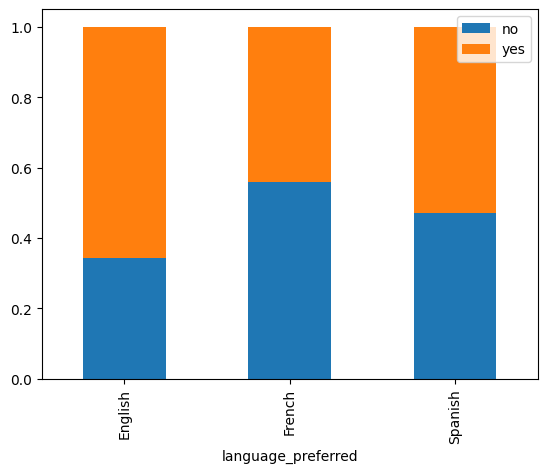

In [54]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

###Step 1: Define the null and alternate hypotheses


H0: The conversion rate of the new page is equal to the conversion rate of the old landing page.

Ha: The conversion rate of the new page is greater than the conversion rate of the old page.

###Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. Based on this information, a **chi-square test for independence** would be the best and most effective test.

###Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

###Step 4: Collect and prepare data

In [55]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


**Chi-Squared test for independence assumptions:**

- Categorical variables - Yes

- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 5: Calculate the p-value

In [56]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [57]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw inference

Since the p-value is greater than the level of signifcance of 5%, the null hypothesis fails to be rejected. This means that that the converted status is independent of the preferred language.

## 4. Is the time spent on the new page same for the different language users?

In [58]:
df_new = df[df['landing_page'] == 'new']

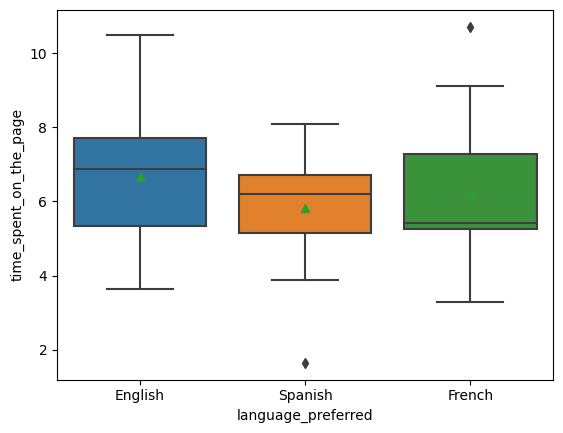

In [59]:
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [60]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

###Step 1: Define the null and alternate hypothesis

H0:
  The mean time spent on the new lading page is the same across all preferred langauges.

Ha:
  At least one of the mean times spent on the new landing page is different amongst the preferred languages.

###Step 2: Select Appropriate test

This is a problem, concerning three population means. Based on this information, a **one-way ANOVA test** would be the most appropriate.

###Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05

###Step 4: Collect and prepare data

In [61]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

**Shapiro-Wilk's test**

H0: Follows a normal distribution

Ha: Does not follow a normal distribution

In [66]:
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis, meaning the response follows a normal distribution.

**Levene's Test**

H0: All the population variances are equal

Ha: At least one variance is different from the rest

In [67]:
from scipy.stats import levene

statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


###Step 5: Calculate the p-value

In [64]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


Since the p-value is large, we fail to reject the null hypothesis, meaning the variances are equal.

**One-way ANOVA test assumptions:**

- The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk's test.

- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.

- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

###Step 6: Compare the p-value with $\alpha$

In [65]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw inference

Since the p-value is greater than the level of significance at 5%, the null hypothesis fails to be rejected. This means that the mean time spent on the new landing page is relatively similar regardless of the preferred language.

## Conclusion and Business Recommendations

**Conclusions:**

 - To answer the question if users spend more time on the new landing page than the existing landing page, a two-sample independent t-test was performed. A p-value of 0.0001 was resulted from the test, which is less than the level of significance of 5%. Therefore, the null hypothesis is rejected. What this means in context is that there is significant evidence that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

 - To answer the question if the conversion rate for the new page is greater than the conversion rate of the old page, a two-proportion z-test was performed. A p-value of 0.008 was resulted from the test, which is less than the level of significance of 5%. Therefore, the null hypothesis is rejected. What this means in context is that there is significant evidence that the conversion rate of the new landing page was greater than the conversion rate of the old landing page.

 - To answer the question if the conversion status and preferred language are related, a chi-square test for independence was performed. A p-value of 0.213 was resulted from the test, which is more than the level of significance of 5%. Therefore, the null hypothesis is failed to be rejected. What this means in context is that conversion status and the preferred language of the landing page are independent of each other.

 - To answer the question if the time spent on the new landing page differed based on preferred language, a one-way ANOVA test was performed. A p-value of 0.432 was resulted from the test, which is more than the level of significance of 5%. Therefore, the null hypothesis is failed to be rejected. What this means in context is that the mean time spent on the new landing page was relatively similar across all the preferred languages.

**Recommendations:**

- E-News Express should fully implement the new landing page as it gains a lot more traction than the old landing page. The time spent on the new landing page is greater than the time spent on the old landing page is evidence that users prefer it.

- It might be helpful to cut ties with the old landing page as there are low correlation in average time spent and conversion rate. The new landing page has an increased conversion rate, meaning that more resources should be directed towards it to increase membership.

- Launch the new landing page incorporating all the existing preferred language. There is no huge difference between the average time spent on the new page across the preferred languages, the conversion rate to subscribers will be similar throughout. Maybe consider adding more languages to the portal to reach a wider audience.

___